In [ ]:
#Install yfinance

!pip install yfinance --quiet

In [ ]:
#Import statements

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn import metrics
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
#Download the data from yfinance

df= yf.download('RELIANCE.NS',period="max",
progress =False)

In [ ]:
#Save it into a csv file

df.to_csv('reliance.csv')

In [ ]:
#Read the csv file

data = pd.read_csv('/content/reliance.csv')

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,15.859429,15.944529,15.754989,15.917452,10.477991,48051995
1,1996-01-02,15.878770,15.956133,15.677626,15.793671,10.396508,77875009
2,1996-01-03,16.052837,16.783918,15.878770,15.913584,10.475444,96602936
3,1996-01-04,15.762726,15.813012,15.553845,15.766594,10.378687,100099436
4,1996-01-05,15.704703,15.704703,15.522900,15.658285,10.307391,76935930


In [ ]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
6790,2023-01-02,2550.000000,2579.000000,2548.199951,2575.899902,2575.899902,2453414
6791,2023-01-03,2565.050049,2573.000000,2547.800049,2557.050049,2557.050049,3534596
6792,2023-01-04,2557.000000,2561.050049,2514.000000,2518.550049,2518.550049,4275746
6793,2023-01-05,2523.500000,2536.399902,2504.000000,2514.050049,2514.050049,6293519
6794,2023-01-06,2526.649902,2547.949951,2518.300049,2536.899902,2536.899902,2930338


In [ ]:
#Using candlestick graph to plot the stock prices

figure = go.Figure(data=[go.Candlestick(x=data["Date"],
                                        open=data["Open"], high=data["High"],
                                        low=data["Low"], close=data["Close"])])
figure.update_layout(title = "Reliance Industries Stock Price Analysis", xaxis_rangeslider_visible=False)
figure.show()

In [ ]:
#Changing the datatype

data['Date'] =  pd.to_datetime(data['Date'])

In [ ]:
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [ ]:
#Finding the correlation in the dataframe

data.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999885,0.999877,0.999762,0.999511,-0.303779
High,0.999885,1.000000,0.999844,0.999905,0.999625,-0.303297
Low,0.999877,0.999844,1.000000,0.999896,0.999685,-0.304048
Close,0.999762,0.999905,0.999896,1.000000,0.999753,-0.303612
Adj Close,0.999511,0.999625,0.999685,0.999753,1.000000,-0.296814
Volume,-0.303779,-0.303297,-0.304048,-0.303612,-0.296814,1.000000


In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6795.000000,6795.000000,6795.000000,6795.000000,6795.000000,6.795000e+03
mean,545.190498,551.875604,538.045474,544.690697,524.858941,2.906595e+07
std,665.508631,672.866316,657.765102,665.009336,665.684794,4.850014e+07
min,11.836550,11.890704,11.763055,11.890704,7.827302,0.000000e+00
25%,51.678532,52.544998,50.862350,51.632114,40.583654,6.741770e+06
50%,407.388367,412.539551,401.741882,406.917816,378.062592,1.239140e+07
75%,546.420471,556.239899,537.015869,544.625000,508.782623,3.101139e+07
max,2856.149902,2856.149902,2786.100098,2819.850098,2811.385742,6.686620e+08


In [ ]:
data.isna().sum()

#There are no null values in the dataframe

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

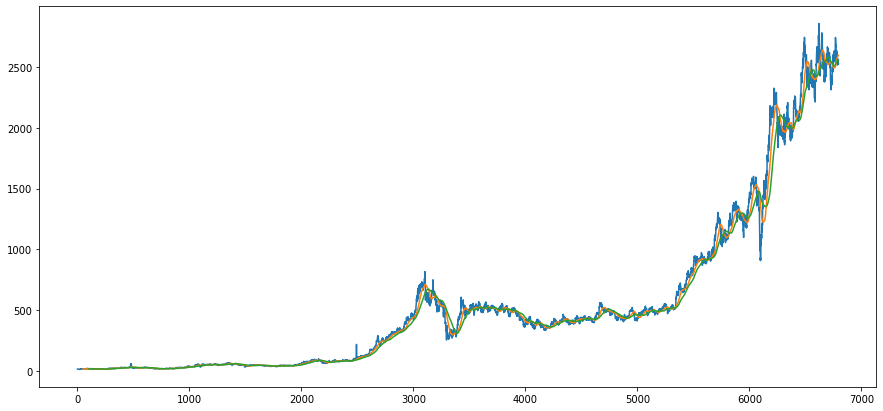

In [ ]:
#Calculating the moving averages for 50 and 100 days

data['MA50'] = data['Close'].rolling(50).mean()
data['MA100'] = data['Close'].rolling(100).mean()
data['Open'].plot(figsize = (15,7))
data['MA50'].plot()
data['MA100'].plot()

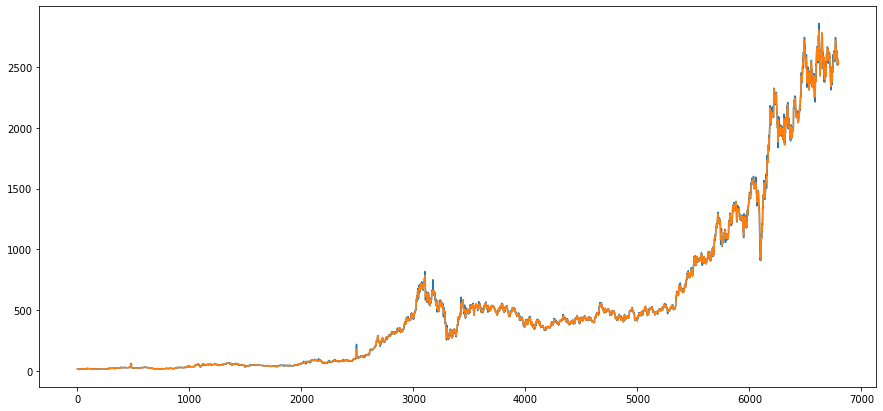

In [ ]:
#Calculating the Exponential moving average with alpha=0.6

data['EMA'] = data['Close'].ewm(com=0.6).mean()
data['Open'].plot(figsize = (15,7))
data['EMA'].plot()

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA50,MA100,EMA
0,1996-01-01,15.859429,15.944529,15.754989,15.917452,10.477991,48051995,NaN,NaN,15.917452
1,1996-01-02,15.878770,15.956133,15.677626,15.793671,10.396508,77875009,NaN,NaN,15.827429
2,1996-01-03,16.052837,16.783918,15.878770,15.913584,10.475444,96602936,NaN,NaN,15.884273
3,1996-01-04,15.762726,15.813012,15.553845,15.766594,10.378687,100099436,NaN,NaN,15.809240
4,1996-01-05,15.704703,15.704703,15.522900,15.658285,10.307391,76935930,NaN,NaN,15.714188


In [ ]:
data.corr()

,Open,High,Low,Close,Adj Close,Volume,MA50,MA100,EMA
Open,1.000000,0.999885,0.999877,0.999762,0.999511,-0.303779,0.995990,0.992617,0.999885
High,0.999885,1.000000,0.999844,0.999905,0.999625,-0.303297,0.995988,0.992646,0.999940
Low,0.999877,0.999844,1.000000,0.999896,0.999685,-0.304048,0.995847,0.992518,0.999928
Close,0.999762,0.999905,0.999896,1.000000,0.999753,-0.303612,0.995851,0.992549,0.999953
Adj Close,0.999511,0.999625,0.999685,0.999753,1.000000,-0.296814,0.995656,0.992401,0.999709
Volume,-0.303779,-0.303297,-0.304048,-0.303612,-0.296814,1.000000,-0.313968,-0.321462,-0.303744
MA50,0.995990,0.995988,0.995847,0.995851,0.995656,-0.313968,1.000000,0.998095,0.996111
MA100,0.992617,0.992646,0.992518,0.992549,0.992401,-0.321462,0.998095,1.000000,0.992790
EMA,0.999885,0.999940,0.999928,0.999953,0.999709,-0.303744,0.996111,0.992790,1.000000


In [ ]:
#Creating a new dataframe for creating the model

df2 = data[['MA50','MA100','EMA','Close']]
df2.head()

,MA50,MA100,EMA,Close
0,NaN,NaN,15.917452,15.917452
1,NaN,NaN,15.827429,15.793671
2,NaN,NaN,15.884273,15.913584
3,NaN,NaN,15.809240,15.766594
4,NaN,NaN,15.714188,15.658285


In [ ]:
#Dropping the null values

df2 = df2.dropna()

In [ ]:
#Defining the X variables

X = df2[['MA50','MA100','EMA']]
X.head()

,MA50,MA100,EMA
99,17.674135,16.671626,19.472354
100,17.708948,16.699940,19.020220
101,17.724962,16.728836,18.809571
102,17.749100,16.757537,18.793436
103,17.770220,16.786162,18.690680


In [ ]:
#Defining the y variables

y = df2['Close']
y.head()

99     19.356239
100    18.748940
101    18.683182
102    18.783754
103    18.629026
Name: Close, dtype: float64

In [ ]:
#Using train_test_split to split the dataset in a 80:20 ratio

X_train, X_test,y_train, y_test = train_test_split(X,y ,
                                   random_state=104,
                                   test_size=0.20,
                                   shuffle=True)

In [ ]:
#Fitting the linear regression model

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
#Printing the coefficients of the features

reg_summary = pd.DataFrame(X.columns.values, columns = ['Features'])
reg_summary['Weights'] = model.coef_
reg_summary

,Features,Weights
0,MA50,-0.050999
1,MA100,0.018604
2,EMA,1.032452


In [ ]:
#Printing the intercept values

print('Intercept: ',model.intercept_)

Intercept:  0.08700863712977025


In [ ]:
#Making predictions for the test variables

predictions = model.predict(X_test)

In [ ]:
#Printing the accuracy score of the model

model.score(X_test,y_test)

0.9999069298888682

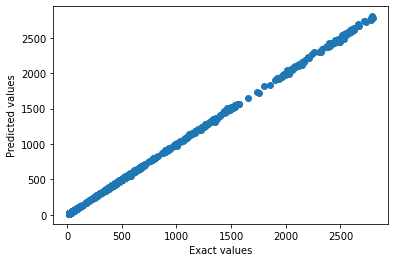

In [ ]:
#Plotting the predicted vs actual values

plt.scatter(y_test, predictions)
plt.plot()
plt.xlabel('Exact values', size = 10)
plt.ylabel('Predicted values', size = 10)
plt.show()

In [ ]:
#Printing other metrics to validate the model's performance

MAE = metrics.mean_absolute_error(y_test,predictions)
MSE = metrics.mean_squared_error(y_test,predictions)
RMSE = np.sqrt(MSE)
R2_score = metrics.r2_score(y_test,predictions)

print("Mean Absolute Error: ",MAE)
print("Mean Squared Error: ",MSE)
print("Root Mean Squared Error: ",RMSE)
print("R2 score: ",R2_score)

Mean Absolute Error:  3.0802305773442944
Mean Squared Error:  40.42442123989619
Root Mean Squared Error:  6.358020229591613
R2 score:  0.9999069298888682
